In [26]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = sns.load_dataset('iris')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df = df[['sepal_length','petal_length','species']]

In [32]:
X= df.iloc[:,0:2]
y = df.iloc[:,-1]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [37]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [38]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [39]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


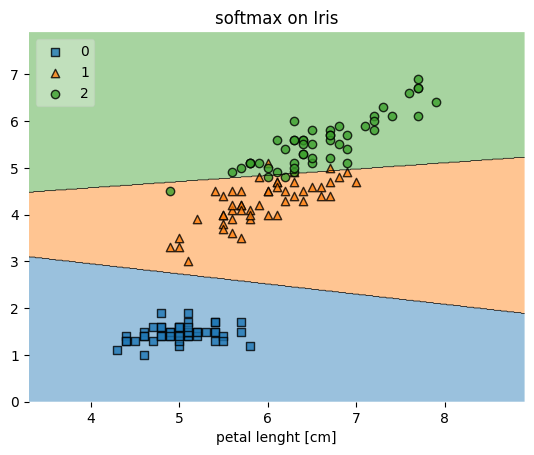

In [40]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf,legend=2)

#adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal lenght [cm]')
plt.title('softmax on Iris')

plt.show()

In [41]:
iris = df.copy()

In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   petal_length  150 non-null    float64
 2   species       150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [48]:
print(iris.columns)


Index(['sepal_length', 'petal_length', 'species'], dtype='object')


KeyError: ' petal_length'

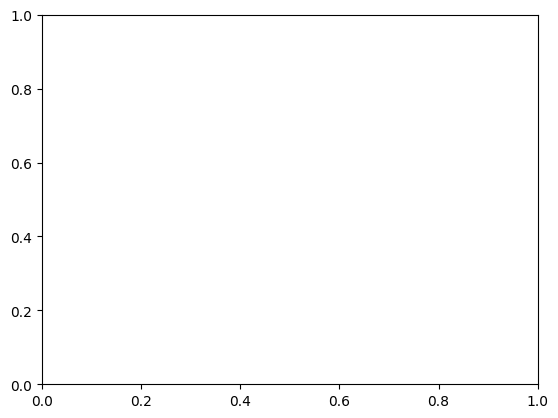

In [49]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter', x='sepal_length', y=' petal_length', color='orange', label='setosa')
iris[iris.species=='setosa'].plot(kind='scatter', x='sepal_length', y=' petal_lengthh', color='blue', label='setosa', ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter', x='sepal_length', y=' petal_length', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length Vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()